#### Download Facades dataset

In [1]:
#Download the data
!wget https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/facades.tar.gz --quiet

In [2]:
#Check if file has been downloaded
!ls -l

total 29468
-rw-r--r-- 1 root root 30168306 Dec  3  2016 facades.tar.gz
drwxr-xr-x 1 root root     4096 Oct  5 16:31 sample_data


In [3]:
#Unzip zip file
!tar -xzf facades.tar.gz

In [4]:
#Confirm if file has been unzipped
!ls -l

total 29472
drwxrwxrwx 5 8140  779     4096 Nov 21  2016 facades
-rw-r--r-- 1 root root 30168306 Dec  3  2016 facades.tar.gz
drwxr-xr-x 1 root root     4096 Oct  5 16:31 sample_data


In [5]:
!ls -l facades/train

total 20772
-rwxrwxr-x 1 8140 779 54930 Nov 21  2016 100.jpg
-rwxrwxr-x 1 8140 779 61176 Nov 21  2016 101.jpg
-rwxrwxr-x 1 8140 779 65235 Nov 21  2016 102.jpg
-rwxrwxr-x 1 8140 779 45138 Nov 21  2016 103.jpg
-rwxrwxr-x 1 8140 779 41071 Nov 21  2016 104.jpg
-rwxrwxr-x 1 8140 779 54517 Nov 21  2016 105.jpg
-rwxrwxr-x 1 8140 779 49256 Nov 21  2016 106.jpg
-rwxrwxr-x 1 8140 779 57845 Nov 21  2016 107.jpg
-rwxrwxr-x 1 8140 779 43360 Nov 21  2016 108.jpg
-rwxrwxr-x 1 8140 779 45036 Nov 21  2016 109.jpg
-rwxrwxr-x 1 8140 779 61414 Nov 21  2016 10.jpg
-rwxrwxr-x 1 8140 779 56666 Nov 21  2016 110.jpg
-rwxrwxr-x 1 8140 779 56500 Nov 21  2016 111.jpg
-rwxrwxr-x 1 8140 779 38206 Nov 21  2016 112.jpg
-rwxrwxr-x 1 8140 779 51609 Nov 21  2016 113.jpg
-rwxrwxr-x 1 8140 779 47182 Nov 21  2016 114.jpg
-rwxrwxr-x 1 8140 779 53348 Nov 21  2016 115.jpg
-rwxrwxr-x 1 8140 779 58914 Nov 21  2016 116.jpg
-rwxrwxr-x 1 8140 779 44998 Nov 21  2016 117.jpg
-rwxrwxr-x 1 8140 779 35630 Nov 21  2016 118.jpg
-rwxrwxr-

In [6]:
#Number of training files
!ls -l facades/train | wc -l

401


In [7]:
#Number of test files
!ls -l facades/test | wc -l

107


#### Vizualize data

In [8]:
import tensorflow as tf
import os
import numpy as np

In [9]:
#Get a list of all training files
train_img_files = os.listdir('facades/train')
test_img_files = os.listdir('facades/test')

In [10]:
print(train_img_files)

['7.jpg', '18.jpg', '248.jpg', '392.jpg', '184.jpg', '341.jpg', '276.jpg', '26.jpg', '364.jpg', '195.jpg', '376.jpg', '244.jpg', '375.jpg', '103.jpg', '9.jpg', '282.jpg', '167.jpg', '213.jpg', '324.jpg', '363.jpg', '159.jpg', '365.jpg', '183.jpg', '63.jpg', '271.jpg', '290.jpg', '259.jpg', '187.jpg', '25.jpg', '158.jpg', '130.jpg', '124.jpg', '161.jpg', '44.jpg', '348.jpg', '382.jpg', '98.jpg', '229.jpg', '367.jpg', '108.jpg', '142.jpg', '166.jpg', '349.jpg', '104.jpg', '254.jpg', '222.jpg', '55.jpg', '172.jpg', '43.jpg', '325.jpg', '36.jpg', '16.jpg', '198.jpg', '342.jpg', '22.jpg', '338.jpg', '146.jpg', '143.jpg', '232.jpg', '93.jpg', '237.jpg', '381.jpg', '359.jpg', '250.jpg', '51.jpg', '177.jpg', '148.jpg', '329.jpg', '379.jpg', '292.jpg', '394.jpg', '233.jpg', '190.jpg', '285.jpg', '252.jpg', '33.jpg', '192.jpg', '69.jpg', '74.jpg', '243.jpg', '82.jpg', '31.jpg', '46.jpg', '80.jpg', '118.jpg', '234.jpg', '180.jpg', '380.jpg', '284.jpg', '258.jpg', '164.jpg', '279.jpg', '274.jpg', 

Original image size (512, 256)


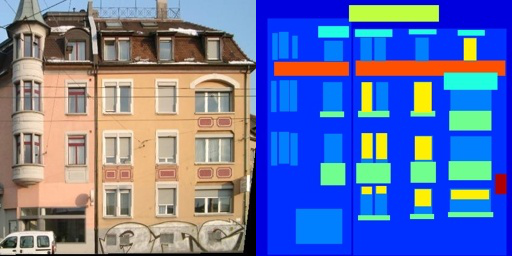

In [11]:
#Visualize a random image
img_num = np.random.randint(0, len(train_img_files))
img = tf.keras.preprocessing.image.load_img('./facades/train/' + train_img_files[img_num])
print('Original image size', img.size)
img

In [12]:
#Define input image size
img_height = 256
img_width = 256
img_depth = 3

#### Buid Generator

In this case, the input will be an Image (Satelite image) and output will be Map image. As we are having image as input and output, you can use a U-NET as generator.

Function to create two Convolutional layer block

In [13]:
def conv2d_block(input_tensor, n_filters):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = tf.keras.layers.Conv2D(n_filters, (3,3), kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    # second layer
    x = tf.keras.layers.Conv2D(n_filters, (3,3), kernel_initializer = 'he_normal', padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    return x

In [14]:
def build_generator(input_img, n_filters=16, dropout=0.1):

    #ENCODER - DOWNSAMPLE the image

    #First Block
    c1 = conv2d_block(input_img, n_filters*1) #256x256
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
    p1 = tf.keras.layers.Dropout(dropout)(p1)
    #output will be 64x64x16 for image size 128x128x16

    #Second Block
    c2 = conv2d_block(p1, n_filters*2) #128x128x32
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    p2 = tf.keras.layers.Dropout(dropout)(p2)
    #output will be 32x32x32

    #Third Block
    c3 = conv2d_block(p2, n_filters*4) 
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
    p3 = tf.keras.layers.Dropout(dropout)(p3)
    #output will be 16x16x64

    #Fourth Block
    c4 = conv2d_block(p3, n_filters*8)
    p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)
    p4 = tf.keras.layers.Dropout(dropout)(p4)
    ##output will be 8x8x128 

    #Fifth Block
    c5 = conv2d_block(p4, n_filters*16)
    #output will be 8x8x256

    #We now have output of Encoder

    #DECODER - UPSAMPLE the feature to generate mask

    #First Block - connected to fourth block on DOWNSAMPLE side
    u6 = tf.keras.layers.Conv2DTranspose(n_filters * 8, (3, 3), 
                                         strides = (2, 2), 
                                         padding = 'same')(c5) #16x16x128
    u6 = tf.keras.layers.concatenate([u6, c4]) #16x16x256
    u6 = tf.keras.layers.Dropout(dropout)(u6) 
    c6 = conv2d_block(u6, n_filters * 8) #16x16x128

    #Second Block - connected to third block on DOWNSAMPLE side
    u7 = tf.keras.layers.Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    u7 = tf.keras.layers.Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4)

    #Third Block - connected to second block on DOWNSAMPLE side
    u8 = tf.keras.layers.Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    u8 = tf.keras.layers.Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2)

    #Fourth Block - connected to first block on DOWNSAMPLE side
    u9 = tf.keras.layers.Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1])
    u9 = tf.keras.layers.Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1) #128 x 128 x 16

    #Build the Output layer
    outputs = tf.keras.layers.Conv2D(3, (1, 1), activation='tanh')(c9) #128x128x1

    #Build the model using different layers
    model = tf.keras.Model(inputs=[input_img], outputs=[outputs])
    
    return model

In [15]:
gen_a = build_generator(tf.keras.layers.Input(shape=(256,256,3,)))

In [16]:
gen_a.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

#### Build Discriminator
Write a function to build a discriminator model. Discriminator's input will be images (both Satelite and Map images). Also discriminator will get real and fake images.

In [17]:
def build_discriminator(input_image, target_image):
    
    #Network parameters
    filter_size = 5
    num_filters = [32, 64, 128, 256]
    stride_size = [2, 2, 2, 1]
    
    #Build the network
    #Concatenate map image and satelite image
    x = tf.keras.layers.concatenate([input_image, target_image])
    
    
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.Conv2D(32, kernel_size=[5,5], strides=2, padding='same')(x)
    
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=[5,5], strides=2, padding='same')(x)
    
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.Conv2D(128, kernel_size=[5,5], strides=2, padding='same')(x)
    
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.Conv2D(1, kernel_size=[5,5], strides=1, padding='same', activation='sigmoid')(x)
    
    #Build Model
    discriminator = tf.keras.models.Model([input_image, target_image],
                                          x, name='discriminator')
    
    return discriminator

#### Building Models for training
Write a function to create Generator, Discriminator and Adversarial model

In [18]:
def build_models():
    
    lr = 2e-4
    decay = 6e-8
    
    #Build input layers
    input_image = tf.keras.layers.Input(shape=(img_height,img_width,img_depth,)) #Input layer for satelite images
    target_image = tf.keras.layers.Input(shape=(img_height,img_width,img_depth,)) #Input layer for map images

    #Build Base Discriminator model
    base_discriminator = build_discriminator(input_image, target_image)
    
    #Define discriminator, optimizer and compile model
    discriminator = tf.keras.models.Model(inputs=base_discriminator.inputs, 
                                          outputs=base_discriminator.outputs)
    optimizer = tf.keras.optimizers.RMSprop(lr=lr, decay=decay)
    discriminator.compile(loss='binary_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])
    
    #Build Frozen Discriminator
    frozen_discriminator = tf.keras.models.Model(inputs=base_discriminator.inputs, 
                                          outputs=base_discriminator.outputs)
    #Freeze the weights of discriminator during adversarial training
    frozen_discriminator.trainable = False

    #Build Generator model
    generator = build_generator(input_image)
    
    #Build Adversarial model
    optimizer = tf.keras.optimizers.RMSprop(lr=lr * 0.5, decay=decay * 0.5)
    
    #Adversarial = generator + discriminator
    adversarial = tf.keras.models.Model(input_image,
                                        [frozen_discriminator([input_image, generator(input_image)]), 
                                         generator(input_image)])
    
    adversarial.compile(loss=['binary_crossentropy', 'mae'],
                        loss_weights=[1,100],
                        optimizer=optimizer) 
    
    return generator, discriminator, adversarial

#### Training Discriminator and Adversarial Models
Write a function to train Discriminator and Adversarial model in sequential manner

Function to generate training data - batch by batch

In [19]:
def batch_generator(img_files, batch_size=16):

    while True:
        
        input_images = np.zeros((batch_size, img_height, img_width, img_depth))
        target_images = np.zeros((batch_size, img_height, img_width, img_depth))

        idx = np.random.randint(0, len(img_files), batch_size)

        for i in range(batch_size):
            img_num = idx[i]
            img = tf.keras.preprocessing.image.load_img('./facades/train/' + img_files[img_num],target_size=(img_height, img_width*2))
            img_array = tf.keras.preprocessing.image.img_to_array(img)

            input_images[i] = img_array[:, img_width:, :]
            target_images[i] = img_array[:, :img_width, :]

        input_images = (input_images/127.5) - 1
        target_images = (target_images/127.5) - 1

        yield input_images, target_images

In [20]:
a = batch_generator(train_img_files, batch_size=2)
inp, tar = next(a)

In [21]:
inp.shape

(2, 256, 256, 3)

In [22]:
tar.shape

(2, 256, 256, 3)

In [23]:
def train_gan(generator, discriminator, adversarial, 
              train_steps=200, batch_size=64):
    
    #Initialize train and test generator
    train_generator =  batch_generator(train_img_files, batch_size=batch_size)
    test_generator =  batch_generator(test_img_files, batch_size=3)
    
    #Input for testing generator at different intervals, we will generate 3 images
    test_input_images, test_target_images = next(test_generator)
    
    #Start training
    for i in range(train_steps):

        #Genetate a batch
        input_images, target_images = next(train_generator)
        
        #Train DISCRIMATOR

        #Get data from generator
        fake_target_images = generator.predict(input_images)

        #Prepare input for training Discriminator
        X_input_images = np.concatenate((input_images, input_images)) 
        X_target_images = np.concatenate((target_images, fake_target_images)) 
        
        #4. Labels for training
        y_real = np.ones((batch_size, 32,32,1))
        y_fake = np.zeros((batch_size, 32,32,1))
        y = np.concatenate((y_real, y_fake))
        
        #5. Train Discriminator
        d_loss, d_acc = discriminator.train_on_batch([X_input_images, X_target_images], y)
        
        #Train ADVERSARIAL Network
        
        #Prepare labels - training Adversarial network to lie :) - All 1s
        y = np.ones((batch_size, 32,32,1))
        
        #3. Train - Pls note Discrimator is not getting trained here
        _, a1_loss, a2_loss = adversarial.train_on_batch(input_images, [y, target_images])
        
        if i % 50 == 0:
            #Print loss and Accuracy for both networks
            print("%s [Discriminator loss: %f, acc: %f, Adversarial - Dis-loss: %f, Gen-loss: %f]" % (i, d_loss, d_acc, a1_loss, a2_loss) )
        
        #Save generated images to see how well Generator is doing
        if (i+1) % 200 == 0:
            
            #Generate map images
            generated_target_images = generator.predict(test_input_images)
            
            #Display images
            plot_images(test_input_images, test_target_images, generated_target_images)
            
    #Save Generator model
    generator.save('pix2pix_cgan.h5') 

#### Function to display Generator images

In [24]:
from matplotlib import pyplot as plt

In [25]:
def plot_images(input_images, target_images, generated_images):
    
    plt.figure(figsize=(8, 8))
    num_images = input_images.shape[0]
    
    for i in range(num_images):
        plt.subplot(num_images, num_images, i + 1)
        plt.imshow(input_images[i]*0.5+0.5)
        plt.axis('off')
    for i in range(num_images):
        plt.subplot(num_images, num_images, num_images + i + 1)
        plt.imshow(target_images[i]*0.5+0.5)
        plt.axis('off')
    for i in range(num_images):
        plt.subplot(num_images, num_images, 2*num_images + i + 1)
        plt.imshow(generated_images[i]*0.5+0.5)
        plt.axis('off')
    
    plt.show()    

#### Start GAN training

In [26]:
tf.keras.backend.clear_session()
G, D, A = build_models()

In [27]:
G.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [28]:
D.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 256, 256, 6)  0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 256, 256, 6)  0           concatenate[0][0]     

In [29]:
A.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
functional_5 (Functional)       (None, 256, 256, 3)  2164627     input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
functional_3 (Functional)       (None, 32, 32, 1)    264225      input_1[0][0]                    
                                                                 functional_5[0][0]               
Total params: 2,428,852
Trainable params: 2,161,683
Non-trainable params: 267,169
_____

0 [Discriminator loss: 0.686761, acc: 0.578415, Adversarial - Dis-loss: 0.703689, Gen-loss: 0.585487]
50 [Discriminator loss: 0.381640, acc: 0.809036, Adversarial - Dis-loss: 0.220817, Gen-loss: 0.422158]
100 [Discriminator loss: 0.537371, acc: 0.774338, Adversarial - Dis-loss: 0.466693, Gen-loss: 0.374199]
150 [Discriminator loss: 0.545638, acc: 0.739685, Adversarial - Dis-loss: 0.853585, Gen-loss: 0.361970]


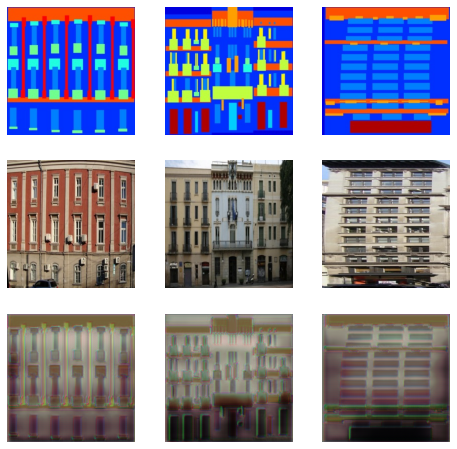

200 [Discriminator loss: 0.553200, acc: 0.739182, Adversarial - Dis-loss: 1.363270, Gen-loss: 0.350817]
250 [Discriminator loss: 0.520565, acc: 0.768127, Adversarial - Dis-loss: 1.704046, Gen-loss: 0.355114]
300 [Discriminator loss: 0.396904, acc: 0.841766, Adversarial - Dis-loss: 1.093845, Gen-loss: 0.318089]
350 [Discriminator loss: 0.500161, acc: 0.761490, Adversarial - Dis-loss: 0.967955, Gen-loss: 0.344981]


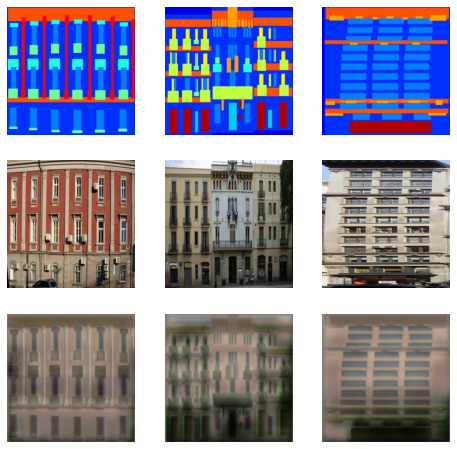

400 [Discriminator loss: 0.356263, acc: 0.842270, Adversarial - Dis-loss: 1.906932, Gen-loss: 0.330998]
450 [Discriminator loss: 0.362555, acc: 0.859116, Adversarial - Dis-loss: 0.975820, Gen-loss: 0.337827]
500 [Discriminator loss: 0.393034, acc: 0.840790, Adversarial - Dis-loss: 1.145740, Gen-loss: 0.311631]
550 [Discriminator loss: 0.436865, acc: 0.790695, Adversarial - Dis-loss: 1.472505, Gen-loss: 0.335780]


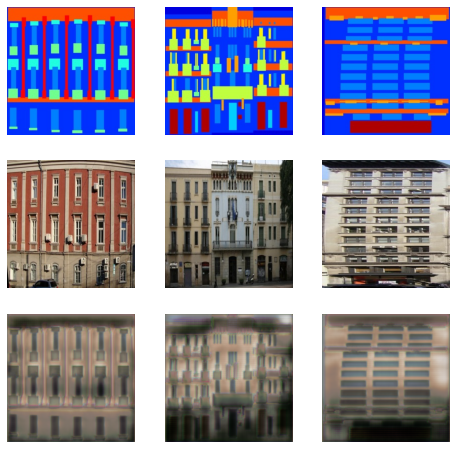

600 [Discriminator loss: 0.443282, acc: 0.796646, Adversarial - Dis-loss: 2.411268, Gen-loss: 0.303197]
650 [Discriminator loss: 0.301743, acc: 0.868362, Adversarial - Dis-loss: 1.377805, Gen-loss: 0.323139]
700 [Discriminator loss: 0.297424, acc: 0.880981, Adversarial - Dis-loss: 1.302717, Gen-loss: 0.304955]
750 [Discriminator loss: 0.314107, acc: 0.887711, Adversarial - Dis-loss: 1.358272, Gen-loss: 0.309849]


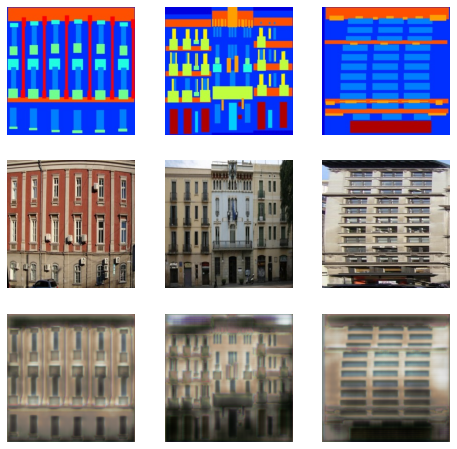

800 [Discriminator loss: 0.411768, acc: 0.833328, Adversarial - Dis-loss: 1.544796, Gen-loss: 0.295692]
850 [Discriminator loss: 0.405920, acc: 0.799271, Adversarial - Dis-loss: 1.827860, Gen-loss: 0.308556]
900 [Discriminator loss: 0.385095, acc: 0.824295, Adversarial - Dis-loss: 0.977471, Gen-loss: 0.313800]
950 [Discriminator loss: 0.348923, acc: 0.849670, Adversarial - Dis-loss: 0.764843, Gen-loss: 0.300514]


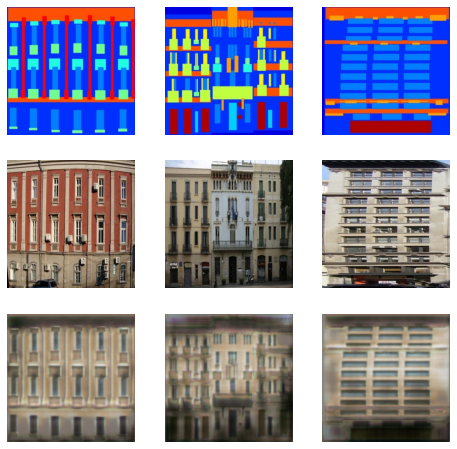

In [30]:
train_gan(G, D, A, train_steps=1000, batch_size=32)

In [31]:
!ls -l

total 38128
drwxrwxrwx 5 8140  779     4096 Nov 21  2016 facades
-rw-r--r-- 1 root root 30168306 Dec  3  2016 facades.tar.gz
-rw-r--r-- 1 root root  8862984 Oct 11 11:18 pix2pix_cgan.h5
drwxr-xr-x 1 root root     4096 Oct  5 16:31 sample_data


In [32]:
model = tf.keras.models.load_model('pix2pix_cgan.h5')

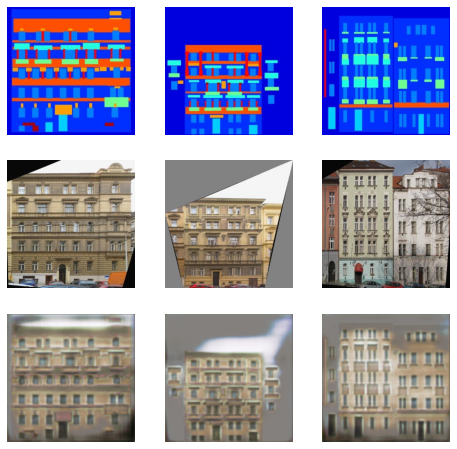

In [33]:
test_generator =  batch_generator(test_img_files, batch_size=3)
x,y = next(test_generator)
fake_pics = model.predict(x)
plot_images(x, y, fake_pics)